### Tratamiento de valores perdidos

<span style="color:blue">**1. Busca y descarga el conjunto de datos “Breast Cancer Wisconsin” del
repositorio UCI Machine Learning.**</span>.



In [1]:
import numpy as np
import matplotlib
import pandas as pd

In [2]:
file = 'breast-cancer-wisconsin.data'

col_names = ['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']

<span style="color:blue">**2. Cárgalo adecuadamente en un Pandas DataFrame**</span>.

In [3]:
# En la clase (2 for benign, 4 for malignant)
df = pd.read_csv(file, names = col_names)
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
class_distribution = df.groupby('Class').size()
print(class_distribution)

Class
2    458
4    241
dtype: int64


<span style="color:blue">**3. Realiza un conteo de los datos faltantes por variable.**</span>.



#### Fiilosofia PANDAS

Se reemplazan los valores con NaN

Marcara todas aquellas situaciones dentro del dataframe con un **NaN** para saber que hay hay un valor perdido

Un problema de **clasificacion** donde tenenmos que detecta que severidad tienen las masas detectadas

Necesitamos trabajar esos datos faltantes

No se puede quedar asi, porque sino se leerian como datas categóricos

Los identificamos primero como **Nan** y ya sabremos que hacer con ellos

In [4]:
# Los convertimos a NaN
df[df=='?'] = np.nan
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)


çAhora realizo un conteo del número de datos perdidos en cada columna

In [6]:
counter = {'Sample_code_number':[],'Clump_Thickness':[],'Uniformity_of_Cell_Size':[],'Uniformity_of_Cell_Shape':[],'Marginal_Adhesion':[],'Single_Epithelial_Cell_Size':[],'Bare_Nuclei':[],'Bland_Chromatin':[],'Normal_Nucleoli':[],'Mitoses':[],'Class':[]}


'','','','','','','','','','',''
# Con la funcion isna()----> se leen los datos perdidos en Pandas
# Los adjuntamos a un disccionario para poder leerlos en un tabla
counter["Sample_code_number"].append(df['Sample_code_number'].isna().sum())
counter["Clump_Thickness"].append(df['Clump_Thickness'].isna().sum())
counter["Uniformity_of_Cell_Size"].append(df['Uniformity_of_Cell_Size'].isna().sum())
counter["Uniformity_of_Cell_Shape"].append(df['Uniformity_of_Cell_Shape'].isna().sum())
counter["Marginal_Adhesion"].append(df['Marginal_Adhesion'].isna().sum())
counter["Single_Epithelial_Cell_Size"].append(df['Single_Epithelial_Cell_Size'].isna().sum())
counter["Bare_Nuclei"].append(df['Bare_Nuclei'].isna().sum())
counter["Bland_Chromatin"].append(df['Bland_Chromatin'].isna().sum())
counter["Normal_Nucleoli"].append(df['Normal_Nucleoli'].isna().sum())
counter["Mitoses"].append(df['Mitoses'].isna().sum())
counter["Class"].append(df['Class'].isna().sum())




<span style="color:green">**Datos perdidos por columna**</span>.

In [7]:
df_counter = pd.DataFrame(counter)

df_counter


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0,0,0,0,0,0,16,0,0,0,0


Según la tabla tenemos exactamente 16 datos faltantes en la columna **Bare Nuclei**

<span style="color:blue">**4. Aplica las estrategias de eliminación de valores faltantes estudiadas y
compara sus efectos. Cuestiónate si en este caso alguna podría ser
una solución factible al problema de los datos perdidos.**</span>.



No puedo simple,emte elimnar la fila o la columna porque reduzco mi capacidad discriminante

Necesito encontrar una estrategia mejor para aplicar la eliminacion de valores faltantes

Una vez identificados los patrones como NaN, pordemos utilizar el metodo **drona**

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

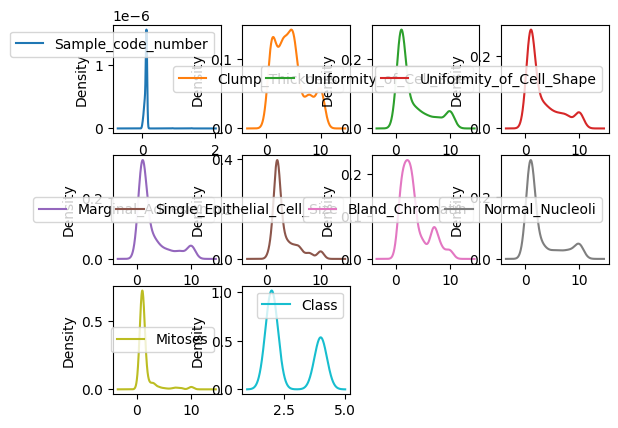

In [8]:
df_remove = pd.DataFrame(df)

# Cada una de las varaiables que conforman el DATA SET
input_data = df_remove[df_remove.columns[:]]
#input_data.hist()

input_data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)

In [9]:


# -------------------------------#
# Aquellas FILAS que tienen al menos dos valores faltantes
# dropna(thresh=2)

# Aquellas COLUMNAS que tienen almenos dos valores faltantes.
# dropna(axis=1,thresh=2)

# Aquellas columnas que tengas al menos UN valor flatante
#clean_data.dropna(axis =1, inplace=True)

# Aquellas filas que tienen todos los valores faltantes
#clean_data.dropna(how= 'all')

# -------------------------------#


In [10]:
# Aquellas filas que tienen todos los valores faltantes
df_remove.dropna(how= 'all')

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Aqui elimina la columna por tiene más de dos valores faltantes

In [11]:
# Aquellas COLUMNAS que tienen almenos dos valores faltantes.
df_remove.dropna(axis=1,thresh=2)
df_remove.shape

(699, 11)

Aquí también elimina la columna por tener más de un valor faltante

In [12]:
# Aquellas columnas que tengas al menos UN valor faltante
df_remove.dropna(axis =1, inplace=True)

df_remove.shape

(699, 10)

Puedo intentar borra algunas filas, pero la unica columna que muestra valores faltentes es **Bare Nuclei**.

Entonces ninguna fila tiene más de 1 valor faltante

In [23]:
# Aquellas FILAS que tienen al menos dos valores faltantes
df_remove.dropna(thresh=2)
df_remove.shape

(699, 10)

<span style="color:blue">**5. Aplica las estrategias de imputación, tanto univariantes como
multivariantes, de valores faltantes estudiadas.**</span>.

<center> <h4><span style="color:red">UNI-VARIANTE</span></h4> </center>

**Pero porque se parece ese valor que encontramos al valor perdido?**

Se parece en base a las variabels que no presentan valores perdidos dentro del dataset.

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer
import pandas as pd

**SimpleImputer** utiliza los datos de entrenamiento para generar un modelo de imputación

In [30]:
clean_data  = df.copy()


# Lo primero es crear el objeto
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Alimento el modelo de imputacion con los datos de entrenamiento
imputer.fit(clean_data)

# Aplica el modelo de imputacion recien creado sobre los datos que se le pasen
newdata = imputer.transform(clean_data)

col_names = ['Sample_code_number','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
data = pd.DataFrame(newdata)

data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


Ahora muestro un gráfico de densidad para ver la columna de **Bare Nuclei** que antes no se mostraba porque tenía valores NaN

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

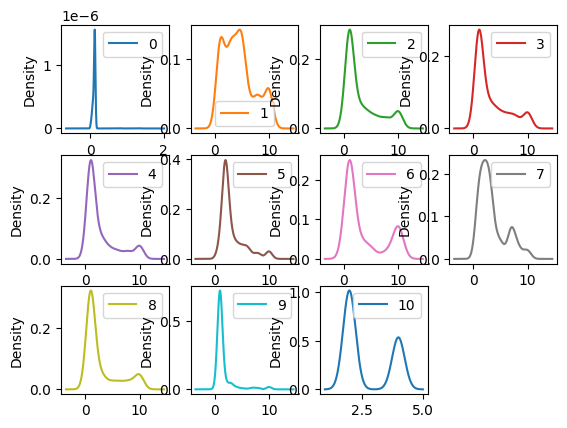

In [34]:
input_data = data[data.columns[:]]
#input_data.hist()

input_data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)

<span style="color:blue">**Otra forma de Imputar datos perdidos**</span>

Podemos escojer un valor significativo dentro del dataframe, o dentro de otra columna


In [42]:
# ------REPLACE -------------------

# Podemos hacerlo de forma manual y poner un valor concreto
data1 = clean_data.replace(np.nan, 1)

data1.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

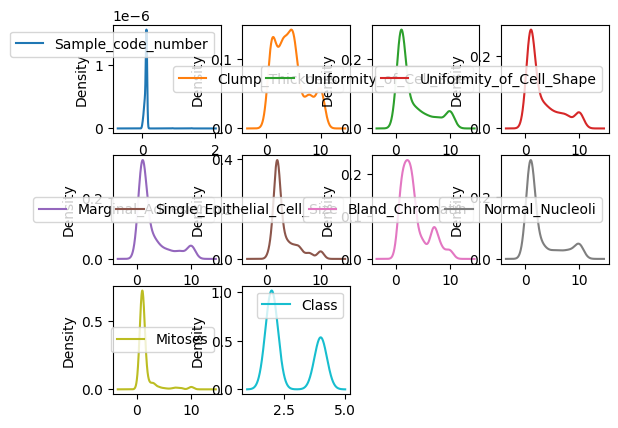

In [43]:
#input_data.hist()

data1.plot(kind='density', subplots=True, layout=(3,4), sharex=False)

Aún cuando aprece no tener valores NaN no muestra la columna en un gráfico de densidad

In [50]:
count = data1['Bare_Nuclei'].isnull().sum()

print(count)

0


In [51]:
# ------INterpolate -------------------

# Cambiarlo por aquellos valores que pertenezcan a una serie temporal
data.interpolate()
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


Aquí tambíen me aparece la columna **Bare Nuclei** con los nuevso valores en lugar del **NaN**

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

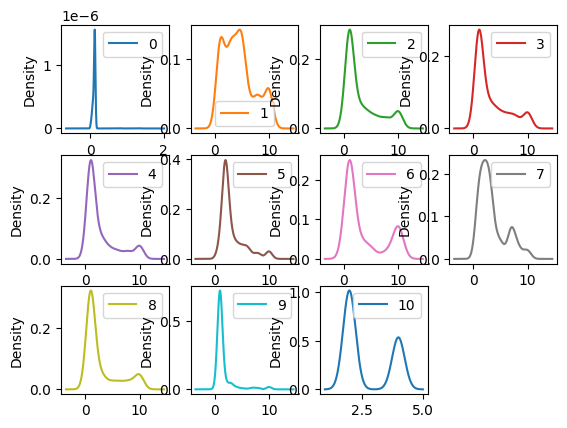

In [52]:
data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)

<center> <h4><span style="color:red">MULTI-VARIANTE</span></h4> </center>

Uno de los modelos más sensillos para econtrar valor perdido en KNN imputer

Busca los patrones más cercanos a traves de una distancia euclídea

1-NN-imputer Cuando encuentro el valor más cercano lo INPUTO en la posicion del valor faltante.

In [53]:
from sklearn.impute import KNNImputer

In [54]:
multi_data  = df.copy()

In [55]:
# Primero creo un objeto Imputer
imputer = KNNImputer()


# Despues le paso el dataframe completo
imputer.fit(multi_data)


KNNImputer()

In [56]:
# Lo que hace es generar un nuevo dataframe sin los valores perdido (KNN)
# Utiliza la metrica **Euclidea**
new_data = imputer.transform(multi_data)
data = pd.DataFrame(newdata)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


<span style="color:blue">**6. Compara gráficamente los resultados de la imputación.**</span>.

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

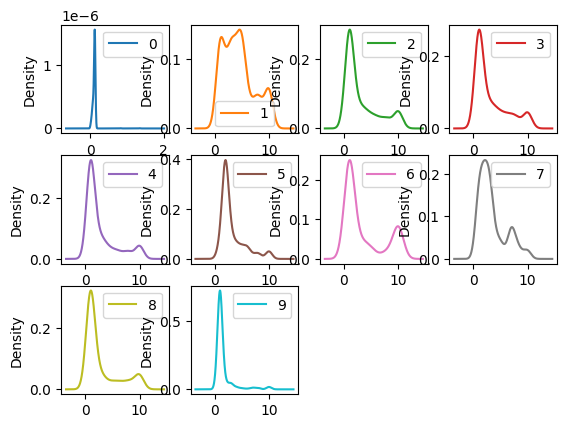

In [58]:
input_data = data[data.columns[:-1]]
input_data.plot(kind='density', subplots=True, layout=(3,4), sharex=False)